## *Implementation*





### 1. The UCB1 Algorithm

The code below provides a basic implementation of the UCB1 algorithm for solving multi-armed bandit problem. The implementation is contained within the `UCB1` class, which consists of three methods:

- The `__init__` initializes the class with the number of arms as input and sets the number of plays and estimated values for each arm to zero.

- The `select_arm` method selects the unplayed yet arm and after all arms are selected at least once it selects the arm with the highest UCB value based on the current number of plays and estimated values for each arm.

- The `update` method updates the number of plays and estimated value for a selected arm after receiving a reward.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class UCB1:
    """
    The UCB1 algorithm implementation.

    """
    def __init__(self, k):
        self.k = k  # number of arms 
        self.num_plays = np.zeros(k) # number of plays assigned to each arm, initially zeroes
        self.values = np.zeros(k)  # mean reward values assigned to each arm, initially zeroes
        
    def select_arm(self):
        for arm in range(self.k):
            if self.num_plays[arm] == 0:
                return arm
        
        ucb_vals = np.zeros(self.k)
        num_total_plays = np.sum(self.num_plays)
        ucb_vals = self.values + np.sqrt(2 * np.log(num_total_plays) / self.num_plays)
        return np.argmax(ucb_vals)
    
    def update(self, arm, reward):
        self.num_plays[arm] += 1
        n, value = self.num_plays[arm], self.values[arm]
        self.values[arm] = ((n - 1) * value + reward) / n


#### Testing the UCB1 for Bernoulli rewards

For the testing, I considered a three-armed Bernoulli bandit with mean rewards $θ_1=0.9$, $θ_2=0.8$, $θ_3=0.7$ with 1000 iterations as suggested in TS_Tutorial.

In [ ]:
# define a class to generate the rewards for each arm using the Bernoulli distribution
class BernoulliReward:
    """
    A class representing a reward system based on Bernoulli distribution with a success probability p.

    """
    def __init__(self, p):
        self.p = p
        
    def draw(self):
        return np.random.binomial(1, self.p)

In [ ]:
# define the number of arms, success probabilities and number of iterations 
probabilities = [0.9, 0.8, 0.7]
num_arms = len(probabilities)
num_iterations = 1000

In [ ]:
# testing the algorithm
def test(num_arms, probabilities, num_iterations):
    rewards = [BernoulliReward(p) for p in probabilities]
    ucb1 = UCB1(num_arms)
    reward_values = np.zeros(num_iterations)

    for i in range(num_iterations):
        arm = ucb1.select_arm()
        reward = rewards[arm].draw()
        reward_values[i] = reward
        ucb1.update(arm, reward)

    cumulative_rewards = np.cumsum(reward_values)
    average_rewards = cumulative_rewards / (np.arange(num_iterations) + 1)

    return cumulative_rewards, average_rewards

In [ ]:
# run the test
ucb1_cumulative_rewards, ucb1_average_rewards = test(num_arms, probabilities, num_iterations)

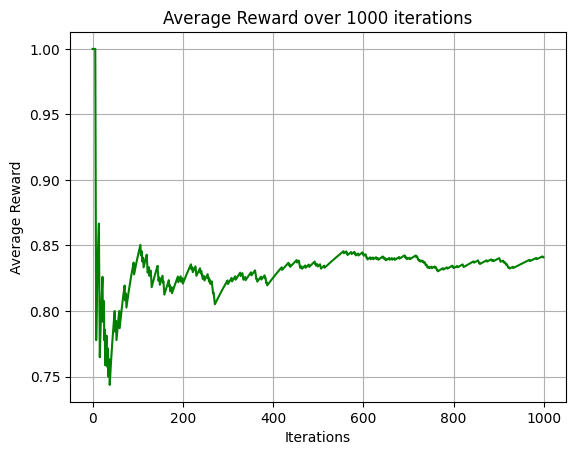

In [ ]:
# plot the average rewards obtained per iteration
plt.plot(ucb1_average_rewards, color='green')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title(f'Average Reward over {num_iterations} iterations')
plt.show()

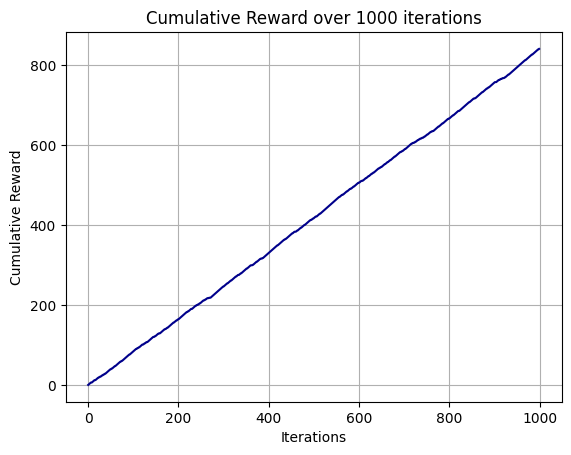

In [ ]:
# plot the cumulative rewards obtained per iteration
plt.plot(ucb1_cumulative_rewards, color='darkblue')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.title(f'Cumulative Reward over {num_iterations} iterations')
plt.show()

### 2. Thompson Sampling for Beta-Bernoulli bandit

The code below provides an implementation of the Thompson Sampling for Beta-Bernoulli bandit for solving multi-armed bandit problem. The implementation in the TS class includes the following three methods:

- The `__init__` initializes the class with the number of arms as input, sets the number of plays and average reward values for each arm to zero. Also it sets the prior parameters for the beta distribution, which are both initialized as ones.

- The `select_arm` method selects an arm to play based on its estimated probability of success. This is done by sampling from a Beta distribution with the current alpha and beta values for each arm, and selecting the arm with the highest sampled value.

- The `update` method updates the number of plays and estimated reward value for a selected arm. Then, it updates the alpha and beta parameters of the corresponding Beta distribution based on the reward received.

In [ ]:
from scipy.stats import beta

In [ ]:
class TS:
    """
    The Thompson Sampling for Beta-Bernoulli Multi-armed bandit.

    """
    def __init__(self, k):
        self.k = k  # number of arms 
        self.num_plays = np.zeros(k) # number of plays assigned to each arm, initially zeroes
        self.values = np.zeros(k)  # average reward values assigned to each arm, initially zeroes
        
        # uniform distribution of prior beta(alpha,beta)
        self.alpha = np.ones(k) 
        self.beta = np.ones(k)
        
    def select_arm(self):
        theta = beta(self.alpha, self.beta).rvs()
        return np.argmax(theta)
        
    def update(self, arm, reward):
        self.num_plays[arm] += 1

        n, value = self.num_plays[arm], self.values[arm]
        self.values[arm] = ((n - 1) * value + reward) / n

        # update alpha and beta
        self.alpha[arm] += reward
        self.beta[arm] += 1 - reward

#### Thompson Sampling for Bernoulli reward

I considered a three-armed Bernoulli bandit with mean rewards $θ_1=0.9$, $θ_2=0.8$, $θ_3=0.7$ with 1000 iterations, as it was used in the UCB1 simulation testing for further comparison of simulated behavior of Thompson Sampling to that of a basic UCB1 algorithm.


In [ ]:
# define the parameters 
probabilities = [0.9, 0.8, 0.7]
num_arms = len(probabilities)
num_iterations = 1000

In [ ]:
# test the TS algorithm for Bernoulli reward
def test_ts(num_arms, probabilities, num_iterations):
    rewards = [BernoulliReward(p) for p in probabilities]
    ts = TS(num_arms)
    reward_values = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        arm = ts.select_arm()
        reward = rewards[arm].draw()
        reward_values[i] = reward
        ts.update(arm, reward)
        
        
    cumulative_rewards = np.cumsum(reward_values)
    average_rewards = cumulative_rewards / (np.arange(num_iterations) + 1)
    
    return average_rewards, cumulative_rewards

In [ ]:
# run the test
ts_average_rewards, ts_cumulative_rewards = test_ts(num_arms, probabilities, num_iterations)

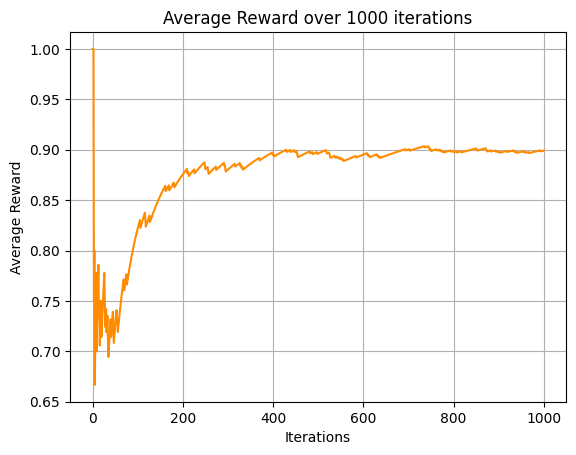

In [ ]:
# plot the average rewards obtained per iteration
plt.plot(ts_average_rewards, color='darkorange')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title(f'Average Reward over {num_iterations} iterations')
plt.show()

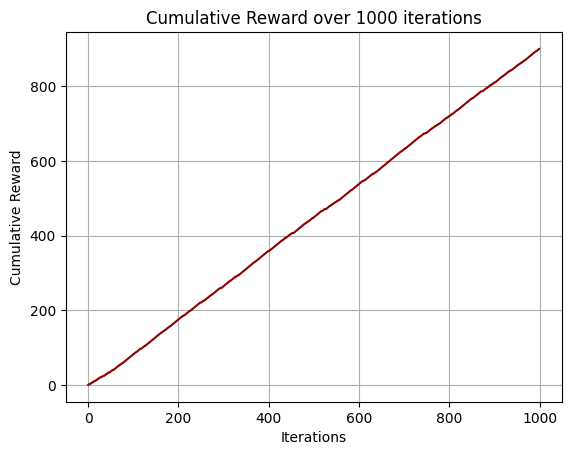

In [ ]:
# plot the cumulative rewards obtained per iteration
plt.plot(ts_cumulative_rewards, color='darkred')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.title(f'Cumulative Reward over {num_iterations} iterations')
plt.show()

#### Comparison of TS simulated behavior for Bernoulli reward and that of the UCB1 algorithm

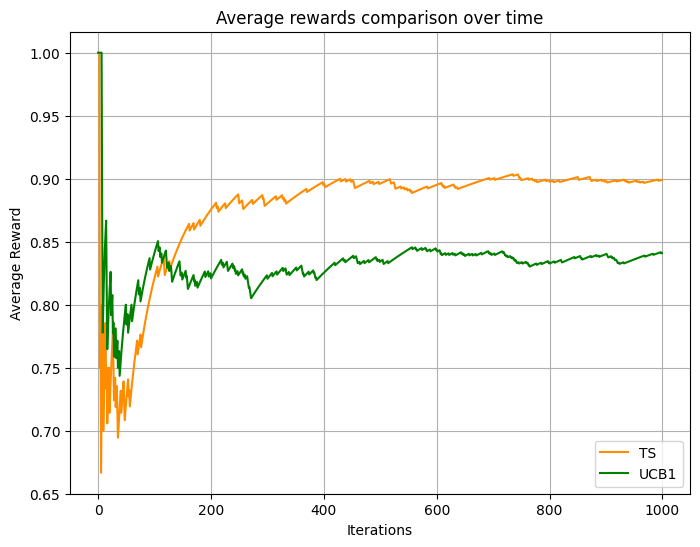

In [ ]:
# plot the average rewards obtained for both algorithms
plt.figure(figsize=(8, 6))

plt.plot(ts_average_rewards, label='TS', color='darkorange')
plt.plot(ucb1_average_rewards, label='UCB1',  color='green')

plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.grid(True)

plt.title('Average rewards comparison over time')
plt.legend(loc='lower right')

plt.show()

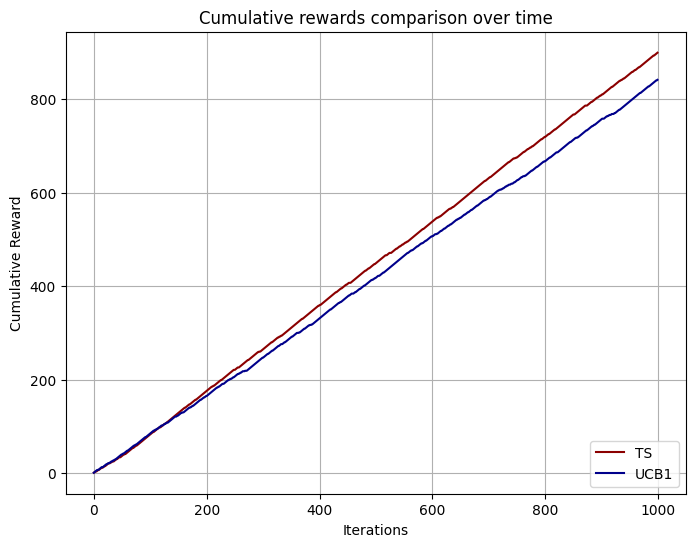

In [ ]:
# plot the cumulative rewards obtained for both algorithms
plt.figure(figsize=(8, 6))

plt.plot(ts_cumulative_rewards, label='TS', color='darkred')
plt.plot(ucb1_cumulative_rewards, label='UCB1', color='darkblue')

plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.grid(True)

plt.title('Cumulative rewards comparison over time')
plt.legend(loc='lower right')

plt.show()

### 3. UCB1 and TS in case of Gaussian rewards

The code below provides the implementation of Thompson Sampling algorithm for Gaussian bandit with conjugate normal prior.
- The `__init__` initializes the parameters of the algorithm: *k* is the number of arms, *mu_0* and *tau_0* are the mean and precision (inverse variance) of the prior distribution of each arm, *tau* is the known precision.
- The `select_arm` method selects an arm based on its posterior normal distribution.
- The `update` method updates the estimates of selected arm value as well as updates posterior distribution using Bayesian inference with conjugate normal prior after receiving the reward for playing the selected arm. ([Table](https://en.wikipedia.org/wiki/Conjugate_prior#When_likelihood_function_is_a_continuous_distribution) of conjugate distributions).


In [ ]:
from scipy.stats import norm

In [ ]:
class TS:
    """
    The Thompson Sampling for Gaussian bandit with conjugate normal prior.

    """
    def __init__(self, k, vars):
        self.k = k  # number of arms
        self.num_plays = np.zeros(k) # number of plays assigned to each arm, initially zeroes
        self.values = np.zeros(k)  # reward values assigned to each arm, initially zeroes
        
        # prior means assumed to be ones and precisions assumed to be a very small number
        self.mu_0 = np.ones(k)
        self.tau_0 = np.ones(k) * 0.0001
        self.tau = 1 / vars
        
    def select_arm(self):
        theta = norm(self.mu_0, np.sqrt(1 / self.tau_0 + 1 / self.tau)).rvs()
        return np.argmax(theta)

    def update(self, arm, reward):
        self.num_plays[arm] += 1

        n, value = self.num_plays[arm], self.values[arm]
        self.values[arm] = ((n - 1) * value + reward) / n

        # update posterior distribution of arm using Bayesian inference with conjugate normal prior
        mu_0, tau_0, tau = self.mu_0[arm], self.tau_0[arm], self.tau[arm]
        self.mu_0[arm] = (tau_0 * mu_0 + tau * self.values[arm]) / (tau_0 + n * tau)
        self.tau_0[arm] = tau_0 + n * tau


#### Test the TS algorithm in case of Gaussian reward

Here is TS algorithm test for the three-armed Gaussian Bandit with the fixed parameters:

In [ ]:
# define a class to generate the rewards for each arm using the Gaussian distribution
class GaussianReward:
    """
    A class representing a reward system based on normal(Gaussian) distribution with mean mu and standard deviation std.
    """
    def __init__(self, mu, std):
        self.mu = mu
        self.std = std
        
    def draw(self):
        return np.random.normal(self.mu, self.std)

In [ ]:
# define the number of arms, mean and std of each arm, and number of iterations
means_stds = [(1, 2), (1.5, 3.5), (1, 1)]
num_arms = len(probabilities)
num_iterations = 1000

In [ ]:
# test the TS algorithm for Gaussian bandit
def test_ts(num_arms, means_stds, num_iterations):
    rewards = [GaussianReward(mu, std) for mu, std in means_stds]
    vars = [std**2 for _, std in means_stds]
    ts = TS(num_arms, np.array(vars))
    reward_values = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        arm = ts.select_arm()
        reward = rewards[arm].draw()
        reward_values[i] = reward
        ts.update(arm, reward)
        
        
    cumulative_rewards = np.cumsum(reward_values)
    average_rewards = cumulative_rewards / (np.arange(num_iterations) + 1)
    
    return average_rewards, cumulative_rewards

ts_average_rewards, ts_cumulative_rewards = test_ts(num_arms, means_stds, num_iterations)

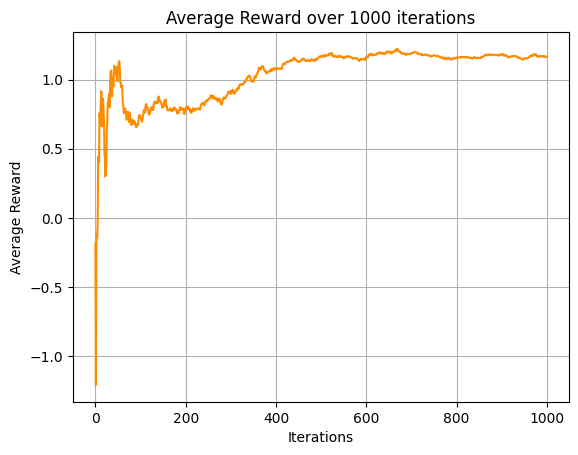

In [ ]:
# plot the average rewards obtained per iteration
plt.plot(ts_average_rewards, color='darkorange')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title(f'Average Reward over {num_iterations} iterations')
plt.show()

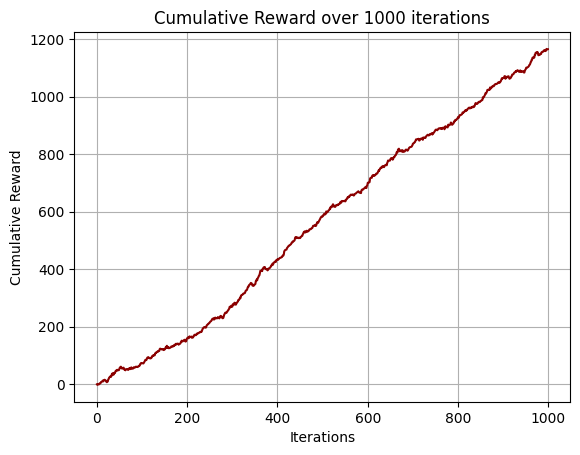

In [ ]:
# plot the cumulative rewards obtained per iteration
plt.plot(ts_cumulative_rewards, color='darkred')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.title(f'Cumulative Reward over {num_iterations} iterations')
plt.show()

#### Test the UCB1 algorithm for Gaussian rewards
UCB1 algorithm was already implemented in the section 1. above. 

Here is the test for three-armed Gaussian Bandit with the same parameters as for TS algorithm test:

In [ ]:
# testing the UCB1 algorithm for Gaussian bandit
def test(num_arms, means_stds, num_iterations):
    rewards = [GaussianReward(mu, std) for mu, std in means_stds]
    ucb1 = UCB1(num_arms)
    reward_values = np.zeros(num_iterations)

    for i in range(num_iterations):
        arm = ucb1.select_arm()
        reward = rewards[arm].draw()
        reward_values[i] = reward
        ucb1.update(arm, reward)

    cumulative_rewards = np.cumsum(reward_values)
    average_rewards = cumulative_rewards / (np.arange(num_iterations) + 1)

    return cumulative_rewards, average_rewards

ucb1_cumulative_rewards, ucb1_average_rewards = test(num_arms, means_stds, num_iterations)

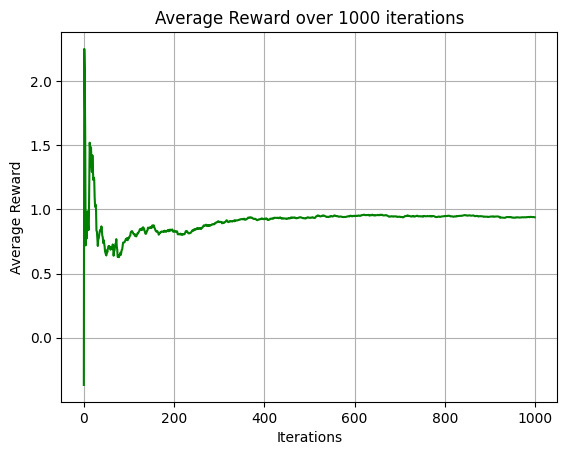

In [ ]:
# plot the average rewards obtained per iteration
plt.plot(ucb1_average_rewards, color='green')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title(f'Average Reward over {num_iterations} iterations')
plt.show()

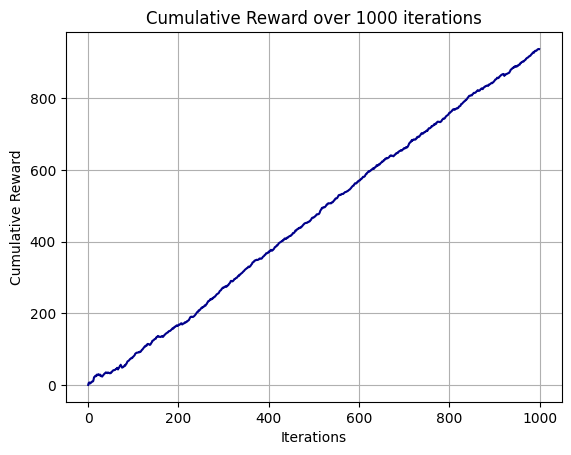

In [ ]:
# plot the cumulative rewards obtained per iteration
plt.plot(ucb1_cumulative_rewards, color='darkblue')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.title(f'Cumulative Reward over {num_iterations} iterations')
plt.show()

#### Comparison of TS simulated behavior for Gaussian reward and that of the UCB1 algorithm

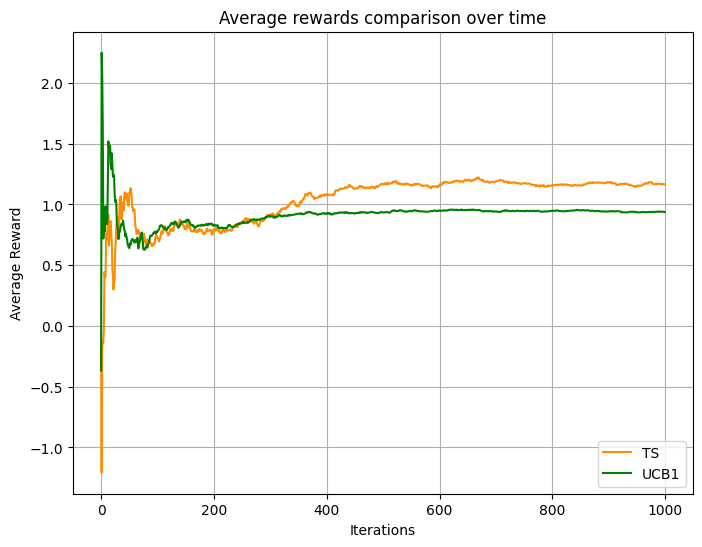

In [ ]:
# plot the average rewards obtained for both algorithms
plt.figure(figsize=(8, 6))

plt.plot(ts_average_rewards, label='TS', color='darkorange')
plt.plot(ucb1_average_rewards, label='UCB1', color='green')

plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.grid(True)

plt.title('Average rewards comparison over time')
plt.legend(loc='lower right')

plt.show()

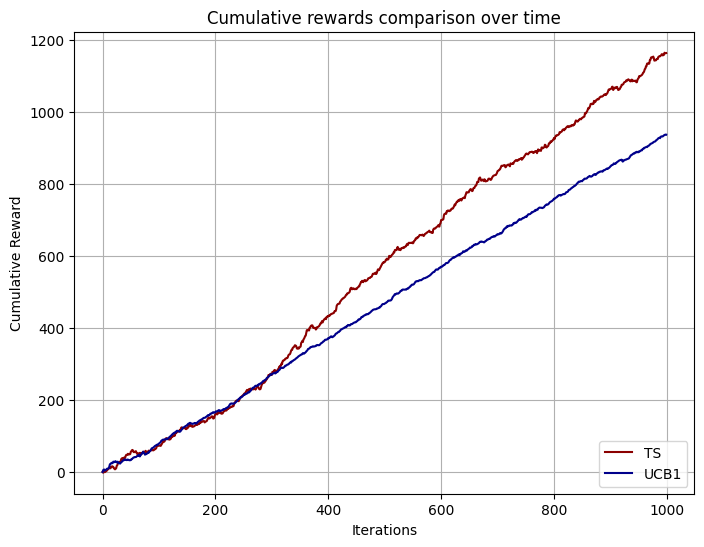

In [ ]:
# plot the cumulative rewards obtained for both algorithms
plt.figure(figsize=(8, 6))

plt.plot(ts_cumulative_rewards, label='TS', color='darkred')
plt.plot(ucb1_cumulative_rewards, label='UCB1', color='darkblue')

plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.grid(True)

plt.title('Cumulative rewards comparison over time')
plt.legend(loc='lower right')

plt.show()

## *Simulation*

###  Thompson Sampling method for Product Assortment (from the Example 7.2 TS_Tutorial, page 51)





This code defines a class `RewardProductAssortment` that gets the demand and reward associated with a product assortment.

 - The `__init__` initializes the decision vector *x*, which represents the assortment of products (a value of 1 indicates that the product is offered, and a value of 0 indicates that it is not), the number of products *n*, the profit associated with each product, the variance of demand and mean vector theta of the multivariate normal distribution.

- The `get` method is used to calculate the demand for each offered product and the reward associated with each offered product.

In [ ]:
class RewardProductAssortment:
    def __init__(self, x, theta, var):
        self.x = list(x) # a decision vector (1 - offered product, 0 - not offered)
        self.n = len(x) # number of products
        self.profit = 1 / self.n # profit assosiated to each product
        self.var = var 
        self.theta = theta 

    def get(self):
        demands, rewards = [], []
        for i in range(self.n):
            if self.x[i] != 0:
                d_i = np.random.lognormal(self.theta[i] * self.x[i], np.sqrt(self.var))
                reward = self.profit * self.x[i] * d_i
                demands.append(d_i)
                rewards.append(reward)
        return demands, rewards

The code below defines a class `TSProductAssortment` that is used to perform Thompson Sampling for product assortment selection.

- The `__init__` initializes the number of products *n*, the variance, the mean vector *mu_0* and covariance matrix *cov_0* of the prior distribution, and the values assigned to each product.

- The `select_assortment` method selects an assortment with the highest expected profit based on the algorithm and formulas from TS_Tutorial.

- The `update` method updates the mean and covariance of the prior distribution using the formulas provided in TS_Tutirial.

In [ ]:
from scipy.stats import multivariate_normal
import itertools

In [ ]:
class TSProductAssortment:
    def __init__(self, n, var):
        self.n = n # number of products
        self.var = var 

        # parameters of prior distribution
        self.mu_0 = np.zeros(n*n)
        self.cov_0 = np.eye(n*n) + np.sqrt(var) * (np.ones((n*n,n*n)) - np.eye(n*n))

        self.profit = 1 / n # equal profit for each product

    def select_assortment(self):
        expected_profits = []
        x_value = [0, 1] 
        x_vectors = list(itertools.product(x_value, repeat=self.n))[:-1]
        theta = np.random.multivariate_normal(self.mu_0, self.cov_0)

        for x in x_vectors:
            expected_p = 0 
            for i in range(self.n):
                for k in range(self.n):
                    expected_p += self.profit * list(x)[i] * np.exp(theta[i*n + k] * list(x)[i] + var / 2)

            expected_profits.append(expected_p)
        
        return x_vectors[np.argmax(expected_profits)], theta # select products based on the highest expected profit

    def update(self, selected_products, demand, reward):
        selected_products = list(selected_products)

        # create a selection matrix
        S = np.zeros((len(demand), self.n))
        for j in range(len(demand)):
            for i in range(self.n):
                S[j,i] = 1

        # create a matrix W by taking the Kronecker product of selected_products and S
        W = np.kron(selected_products, S)

        # create a vector z taking the natural log of demands
        z = np.log(demand)
        
        # update the mean and covariance of the prior distribution
        cov_n_inv = np.linalg.inv(self.cov_0) + (1 / self.var) * W.T @ W
        cov_n = np.linalg.inv(cov_n_inv)
        mu_n = cov_n @ (np.linalg.inv(self.cov_0) @ self.mu_0 + (1 / self.var) * W.T @ z)
        
        self.mu_0 = mu_n
        self.cov_0 = cov_n

In [ ]:
# define the parameters
n = 6
var = 0.04
num_iterations = 500


ts = TSProductAssortment(n, var)
rewards = []

for t in range(num_iterations):
    # select product assortment
    reward_total = 0
    chosen_products, theta = ts.select_assortment()
    # get demand and reward values for chosen products
    rewards_for_pa = RewardProductAssortment(chosen_products, theta, var)
    demand, reward = rewards_for_pa.get()

    # get the total reward
    for i in range(len(reward)):
        reward_total += reward[i] 
    rewards.append(reward_total)
    
    # update algorithm
    ts.update(chosen_products, demand, reward)

cumulative_rewards = np.cumsum(rewards)
average_rewards = cumulative_rewards / (np.arange(num_iterations) + 1)


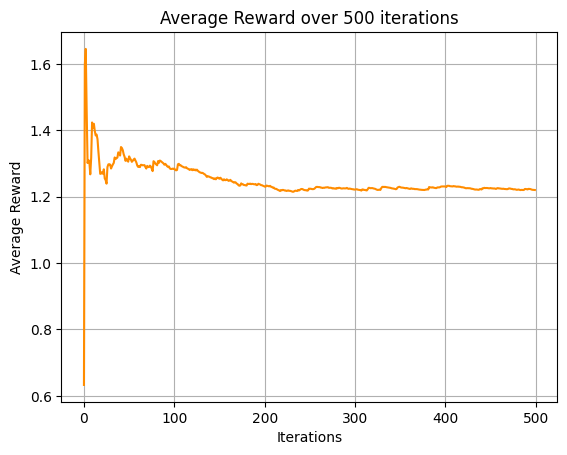

In [ ]:
# plot the average rewards obtained per iteration
plt.plot(average_rewards, color='darkorange')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title(f'Average Reward over {num_iterations} iterations')
plt.show()

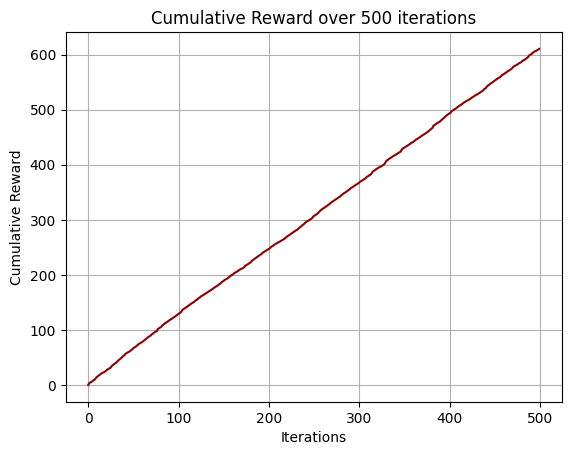

In [ ]:
# plot the cumulative rewards obtained per iteration
plt.plot(cumulative_rewards, color='darkred')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.title(f'Cumulative Reward over {num_iterations} iterations')
plt.show()